## Librerias

In [2]:
# # !pip install pandas==2.2.2
# !pip install numpy==2.2.0
# import numpy
# import pandas
# import cv2  # For opencv-python-headless
# import thinc


In [1]:
# %pip install numpy
# %pip install pandas
# %pip install tabulate
# %pip install matplotlib
# %pip install seaborn
# %pip install statsmodels
# %pip install scikit-learn
# %pip install skopt
# %pip install optuna
# %pip install lifelines
# %pip install fitter
# %pip install scikit-optimize

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import math
import itertools

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence
import optuna

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

from sklearn.ensemble import ExtraTreesClassifier



E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Estimador de Kaplan - Meier
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [49]:
# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut  # Cambio aquí
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [3]:
# Configuración inicial
pd.set_option('display.max_columns', None)
# plt.style.use('seaborn')
sns.set_palette("husl")

In [52]:
import numpy as np
from numpy import mean, std, absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  # o cualquier otra estrategia de CV
from sklearn.linear_model import LinearRegression 

## Datos

In [4]:
#Data
data_glio = pd.read_excel("Datos_Glioma.xlsx")

In [5]:
data_glio.head()

,ORDEN,CODIGO,NOMBRE,IDENTIFICACION,GENERO,EDAD,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,PUNTUACION_KP,PUNTUACION_KP_INMEDIATO,SEGUIMIENTO_MUERTE,ABORDAJE_CRANIOTOMIA,DIAS_POSTOPERATORIO,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,FECHA_CIRUGIA,FECHA_MUERTE,MESES,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT,DX_ANTERIOR,DX_ANTERIOR1,RECLASIFICACION,RECLASIFICACION_EXP
0,1,1253-19,MONTALVO \tMARTINEZ \tCECILIA \t,51672926.0,1,57,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9,0.8,Seguimiento hasta 2021 KPS 70,0.0,6.0,1.0,1.0,1.0,1.0,1.0,27/04/2019,21/11/2022,42.894737,0,0.0,0.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE SIN ALTERACIONES MOL...
1,2,5174-19,CONTRERAS\tCARVAJAL \tCESAR\tARMANDO,17006284.0,0,83,0.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.9,Paciente Fallecido,4.0,6.0,2.0,0.0,1.0,1.0,1.0,05/09/2019,04/09/2020,12.006579,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...
2,3,6990-19,SERRANO \tMORENO\tJUDITH,51896732.0,1,51,0.0,2.0,1.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,En Seguimiento actual,1.0,5.0,2.0,1.0,0.0,0.0,0.0,05/11/2019,30/11/2023,48.881579,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...
3,4,7183-19,CANO \tGARZON\tNANCY\tESMERALDA,41645357.0,1,65,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.8,Paciente Fallecido,0.0,15.0,1.0,0.0,1.0,1.0,1.0,13/11/2019,07/11/2023,47.861842,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILTYPE CON AMPLIFICACION DEL...
4,5,2264-20,TELLEZ\tTELLEZ \tJULIO \tCESAR,19148322.0,0,68,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.9,0.9,Paciente Fallecido,0.0,10.0,2.0,0.0,0.0,0.0,1.0,14/03/2020,06/06/2020,2.763158,0,1.0,1.0,0.0,0.0,B,GMF,I,GLIOBLASTOMA IDH WILDTYPE CON AMPLIFICACION DE...


In [6]:
#Agrupación para Edad
data_glio['Grupo'] = data_glio['EDAD'].apply(lambda x: 'Pediátrico' if x <= 18 else 'Adulto')

# Tabla de frecuencias
print(data_glio['Grupo'].value_counts())

Grupo
Adulto        51
Pediátrico     9
Name: count, dtype: int64


In [7]:
# Eliminar espacios adicionales al inicio y al final de los nombres de las columnas
data_glio.columns = data_glio.columns.str.strip()

# Convertir todos los nombres de las columnas a mayúsculas (opcional)
data_glio.columns = data_glio.columns.str.upper()

# Verificar nuevamente los nombres de las columnas
print(data_glio.columns)

Index(['ORDEN', 'CODIGO', 'NOMBRE', 'IDENTIFICACION', 'GENERO', 'EDAD', 'M228',
       'PATOLOGIA', 'LATERALIDAD_PACIENTE', 'LADO_LESION', 'LOCALIZACION',
       'CONVULSIONES', 'LANGUAGE', 'MOTOR', 'SENSORIAL', 'COMPORTAMIENTO',
       'PUNTUACION_KP', 'PUNTUACION_KP_INMEDIATO', 'SEGUIMIENTO_MUERTE',
       'ABORDAJE_CRANIOTOMIA', 'DIAS_POSTOPERATORIO', 'RESECCION_RAD',
       'NP_CONV', 'NP_DEF_LENG', 'NP_DEF_MOTORA', 'MUERTE', 'FECHA_CIRUGIA',
       'FECHA_MUERTE', 'MESES', 'IDH', 'AMP_EXON2', 'AMP_EXON6',
       'MUTACION_228', 'MUTACION_TERT', 'DX_ANTERIOR', 'DX_ANTERIOR1',
       'RECLASIFICACION', 'RECLASIFICACION_EXP', 'GRUPO'],
      dtype='object')


In [8]:
# Conversión de ID y orden como objetos si los necesitas
data_glio['ORDEN'] = data_glio['ORDEN'].astype(int)
data_glio['IDENTIFICACION'] = data_glio['IDENTIFICACION'].astype(str)

In [9]:
data_glio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ORDEN                    60 non-null     int32  
 1   CODIGO                   60 non-null     object 
 2   NOMBRE                   55 non-null     object 
 3   IDENTIFICACION           60 non-null     object 
 4   GENERO                   60 non-null     int64  
 5   EDAD                     60 non-null     int64  
 6   M228                     37 non-null     float64
 7   PATOLOGIA                55 non-null     float64
 8   LATERALIDAD_PACIENTE     46 non-null     float64
 9   LADO_LESION              55 non-null     float64
 10  LOCALIZACION             55 non-null     float64
 11  CONVULSIONES             55 non-null     float64
 12  LANGUAGE                 55 non-null     float64
 13  MOTOR                    55 non-null     float64
 14  SENSORIAL                55 

Se debe tener en cuenta la clasificación de las mismas:

`int`:	Para variables categóricas codificadas como números (ordinales o nominales).

`float` Para variables numéricas continuas reales.

`object / category` Para variables categóricas en texto o cuando se quiera conservar etiquetas originales.

Nos da alguna información estadística como el número total de filas, media, desviación estándar, valor mínimo, percentil 25, percentil 50, percentil 75 y valor máximo para cada columna.

In [10]:
#Esto es para las variables numericas
data_glio.describe()

,ORDEN,GENERO,EDAD,M228,PATOLOGIA,LATERALIDAD_PACIENTE,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,PUNTUACION_KP,PUNTUACION_KP_INMEDIATO,ABORDAJE_CRANIOTOMIA,DIAS_POSTOPERATORIO,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,MUERTE,MESES,IDH,AMP_EXON2,AMP_EXON6,MUTACION_228,MUTACION_TERT
count,60.000000,60.000000,60.000000,37.000000,55.000000,46.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,45.000000,45.000000,55.000000,50.000000,57.000000,55.000000,55.000000,55.000000,54.000000,60.000000,60.000000,44.000000,44.000000,44.000000,44.000000
mean,40.266667,0.616667,51.983333,0.027027,1.472727,0.934783,0.836364,2.818182,0.418182,0.290909,0.490909,0.436364,0.418182,0.913333,0.775556,2.472727,14.820000,1.456140,0.309091,0.290909,0.418182,0.777778,24.192982,0.266667,0.704545,0.840909,0.045455,0.045455
std,23.632688,0.490301,22.526438,0.164399,0.741733,0.249637,0.976836,2.480225,0.497807,0.497130,0.504525,0.536230,0.497807,0.103573,0.209062,2.106907,25.401824,0.733635,0.466378,0.458368,0.497807,0.419643,23.904309,0.445948,0.461522,0.369989,0.210707,0.210707
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098684,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.250000,0.000000,43.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000,0.500000,5.250000,1.000000,0.000000,0.000000,0.000000,1.000000,4.613487,0.000000,0.000000,1.000000,0.000000,0.000000
50%,41.500000,1.000000,55.500000,0.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.800000,3.000000,8.500000,1.000000,0.000000,0.000000,0.000000,1.000000,12.105263,0.000000,1.000000,1.000000,0.000000,0.000000
75%,57.250000,1.000000,67.000000,0.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,4.000000,14.750000,2.000000,1.000000,1.000000,1.000000,1.000000,42.491776,1.000000,1.000000,1.000000,0.000000,0.000000
max,81.000000,1.000000,88.000000,1.000000,3.000000,1.000000,3.000000,8.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,7.000000,180.000000,3.000000,1.000000,1.000000,1.000000,1.000000,85.361842,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# CARGAR DATOS
# -------------------------------------------------------------------
dataset2 = data_glio.copy()  # Para no dañar la estructura original


In [23]:
# Eliminar filas con valores nulos.
dataset2 = dataset2.dropna( subset= ['MESES', "GENERO", "EDAD", "PATOLOGIA", "LADO_LESION", "LOCALIZACION",
    "CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
    "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA",
    "IDH", "GRUPO"])

In [24]:

dataset2 = dataset2[['MESES', "GENERO", "EDAD", "PATOLOGIA", "LADO_LESION", "LOCALIZACION",
    "CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
    "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA",
    "IDH"]]

## XGBoost con Active Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb

# Codificar variables categóricas
cat_cols = ["GENERO", "PATOLOGIA", "LADO_LESION", "LOCALIZACION", 
            "CONVULSIONES", "LANGUAGE", "MOTOR", "SENSORIAL", 
            "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
            "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA", "IDH"]

le = LabelEncoder()
for col in cat_cols:
    if col in dataset2.columns:
        dataset2[col] = le.fit_transform(dataset2[col])

# Separar características y variable objetivo 
X = dataset2.drop('MESES', axis=1)
y = dataset2['MESES'].values

# Escalar variables numéricas (opcional pero recomendado para XGBoost)
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Dividir en conjunto inicial (10%), pool de consulta (70%) y prueba (20%)
X_init, X_pool, y_init, y_pool = train_test_split(X, y, train_size=0.1, shuffle=True)
X_pool, X_test, y_pool, y_test = train_test_split(X_pool, y_pool, test_size=0.25)  # 20% test

# -------------------------------------------------------------------
# 2. MODELO XGBOOST 
# -------------------------------------------------------------------
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,
    max_depth=5,
    learning_rate=0.05,
    early_stopping_rounds=10,
    random_state=42
)

# Entrenamiento inicial
model.fit(X_init, y_init, eval_set=[(X_test, y_test)], verbose=False)

# -------------------------------------------------------------------
# 3. ESTRATEGIA DE ACTIVE LEARNING (MÁXIMA INCERTIDUMBRE)
# -------------------------------------------------------------------
def query_by_uncertainty(model, X_pool):
    """Selecciona el punto con mayor varianza en las predicciones de los árboles"""
    preds = model.predict(X_pool, output_margin=True)
    if isinstance(preds, np.ndarray):
        preds = [preds]  # Convertir a lista si es un array unidimensional
    uncertainty = np.var(preds, axis=0)
    return np.argmax(uncertainty)

n_queries = 20  # Número de puntos a consultar
r2_scores = []
mse_scores = []

for i in range(n_queries):
    # Consultar el punto más incierto
    query_idx = query_by_uncertainty(model, X_pool)
    X_new = X_pool.iloc[query_idx:query_idx+1]
    y_new = y_pool[query_idx]
    
    # Actualizar datos de entrenamiento
    X_init = pd.concat([X_init, X_new])
    y_init = np.append(y_init, y_new)
    
    # Eliminar punto consultado del pool
    X_pool = X_pool.drop(X_pool.index[query_idx])
    y_pool = np.delete(y_pool, query_idx)
    
    # Reentrenar modelo
    model.fit(X_init, y_init, eval_set=[(X_test, y_test)], verbose=False)
    
    # Evaluar
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    print(f"Iteración {i+1}: R² = {r2:.3f} | MSE = {mse:.1f} | Muestra añadida: {X_new.iloc[0].name}")



Iteración 1: R² = -0.856 | MSE = 440.3 | Muestra añadida: 33
Iteración 2: R² = -0.494 | MSE = 354.5 | Muestra añadida: 40
Iteración 3: R² = -0.726 | MSE = 409.6 | Muestra añadida: 0
Iteración 4: R² = -0.571 | MSE = 372.7 | Muestra añadida: 18
Iteración 5: R² = -0.440 | MSE = 341.5 | Muestra añadida: 34
Iteración 6: R² = -0.667 | MSE = 395.4 | Muestra añadida: 3
Iteración 7: R² = -0.739 | MSE = 412.7 | Muestra añadida: 14
Iteración 8: R² = -0.898 | MSE = 450.2 | Muestra añadida: 54
Iteración 9: R² = -0.716 | MSE = 407.2 | Muestra añadida: 22
Iteración 10: R² = -0.212 | MSE = 287.5 | Muestra añadida: 24
Iteración 11: R² = -0.200 | MSE = 284.6 | Muestra añadida: 1
Iteración 12: R² = -0.196 | MSE = 283.8 | Muestra añadida: 49
Iteración 13: R² = -0.092 | MSE = 259.0 | Muestra añadida: 28
Iteración 14: R² = -0.103 | MSE = 261.8 | Muestra añadida: 53
Iteración 15: R² = 0.164 | MSE = 198.4 | Muestra añadida: 17
Iteración 16: R² = -0.106 | MSE = 262.4 | Muestra añadida: 50
Iteración 17: R² = 0.

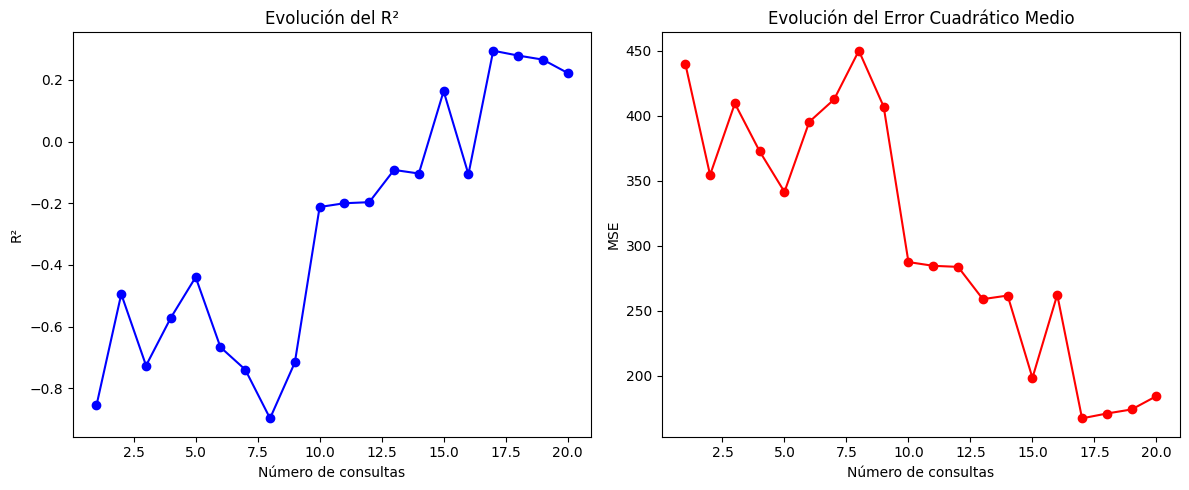

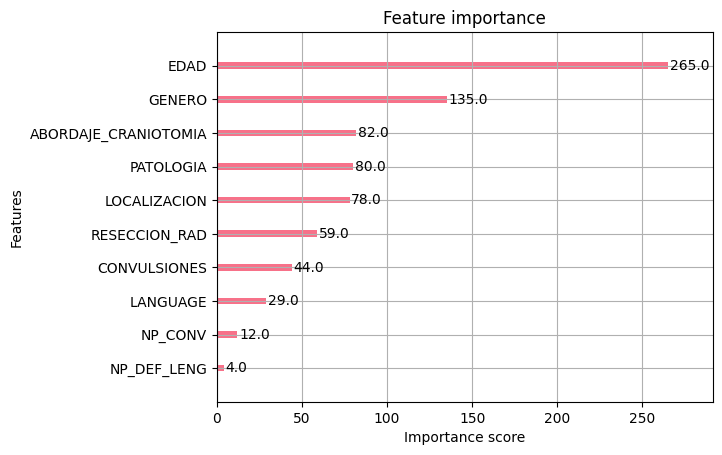

In [26]:
# -------------------------------------------------------------------
# VISUALIZACIÓN DE RESULTADOS
# -------------------------------------------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_queries+1), r2_scores, 'o-', color='blue')
plt.xlabel("Número de consultas")
plt.ylabel("R²")
plt.title("Evolución del R²")

plt.subplot(1, 2, 2)
plt.plot(range(1, n_queries+1), mse_scores, 'o-', color='red')
plt.xlabel("Número de consultas")
plt.ylabel("MSE")
plt.title("Evolución del Error Cuadrático Medio")

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 5. IMPORTANCIA DE VARIABLES (OPCIONAL)
# -------------------------------------------------------------------
xgb.plot_importance(model, max_num_features=10)
plt.show()

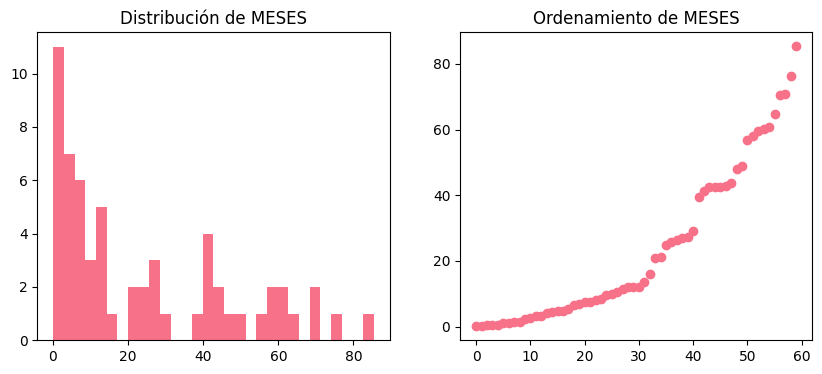

In [39]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30)
plt.title('Distribución de MESES')
plt.subplot(1, 2, 2)
plt.scatter(range(len(y)), np.sort(y))
plt.title('Ordenamiento de MESES')
plt.show()

## LOOCV para clasificación

In [41]:
X = dataset2.drop('MESES', axis=1)
y = dataset2['MESES'].values
print(X.shape, y.shape)

(60, 16) (60,)


Random Forest

In [47]:
cv = LeaveOneOut()
# create model
model = RandomForestRegressor(random_state=1)

In [53]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force positive
scores = absolute(scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 15.275 (10.403)


XGBoots

In [58]:
from xgboost import XGBRegressor
cv = LeaveOneOut()
# create model
model2 = XGBRegressor(random_state=1)
# evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force positive
scores = absolute(scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 16.170 (12.258)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import LeaveOneOut, cross_val_score
from numpy import absolute, mean, std

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Configurar K-Fold (más robusto que LOO)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Función personalizada para R²
def custom_r2_scorer(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

# Modelos
models = {
    "Random Forest": RandomForestRegressor(random_state=1),
    "XGBoost": (random_state=1)
}

# Evaluación
for name, model in models.items():
    print(f"\nEvaluando modelo: {name}")
    
    # MAE
    mae_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    mae_scores = absolute(mae_scores)
    print(f"MAE: {mean(mae_scores):.3f} (±{std(mae_scores):.3f})")
    XGBRegressor
    # R² (con scorer personalizado)
    r2_scores = cross_val_score(model, X, y, scoring=custom_r2_scorer, cv=cv, n_jobs=-1)
    print(f"R²: {mean(r2_scores):.3f} (±{std(r2_scores):.3f})")


Evaluando modelo: Random Forest
MAE: 15.148 (±1.825)
R²: 0.316 (±0.380)

Evaluando modelo: XGBoost
MAE: 16.360 (±2.556)
R²: 0.141 (±0.475)


Para claseficación

In [ ]:
y_clas = np.where(y < 24, 0, 1)  # 0 para menos de 24 meses, 1 para 24 o más

# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y_clas, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.717 (0.451)


En esta clasificación se tiene que el rendimientoto estimado al hacer predicciones sobre nuevos datos tiene una precisión de alrededor del 72%

In [62]:
import xgboost as xgb
y_clas = np.where(y < 24, 0, 1)  # 0 para menos de 24 meses, 1 para 24 o más

# create loocv procedure
cv = LeaveOneOut()
# create model
model2 = xgb.XGBClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model2, X, y_clas, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.683 (0.465)


## Clasificación Semi Supervisada

In [63]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC


In [73]:
dataset2.columns

Index(['GENERO', 'EDAD', 'PATOLOGIA', 'LADO_LESION', 'LOCALIZACION',
       'CONVULSIONES', 'LANGUAGE', 'MOTOR', 'SENSORIAL', 'COMPORTAMIENTO',
       'ABORDAJE_CRANIOTOMIA', 'RESECCION_RAD', 'NP_CONV', 'NP_DEF_LENG',
       'NP_DEF_MOTORA', 'IDH', 'MESES'],
      dtype='object')

E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


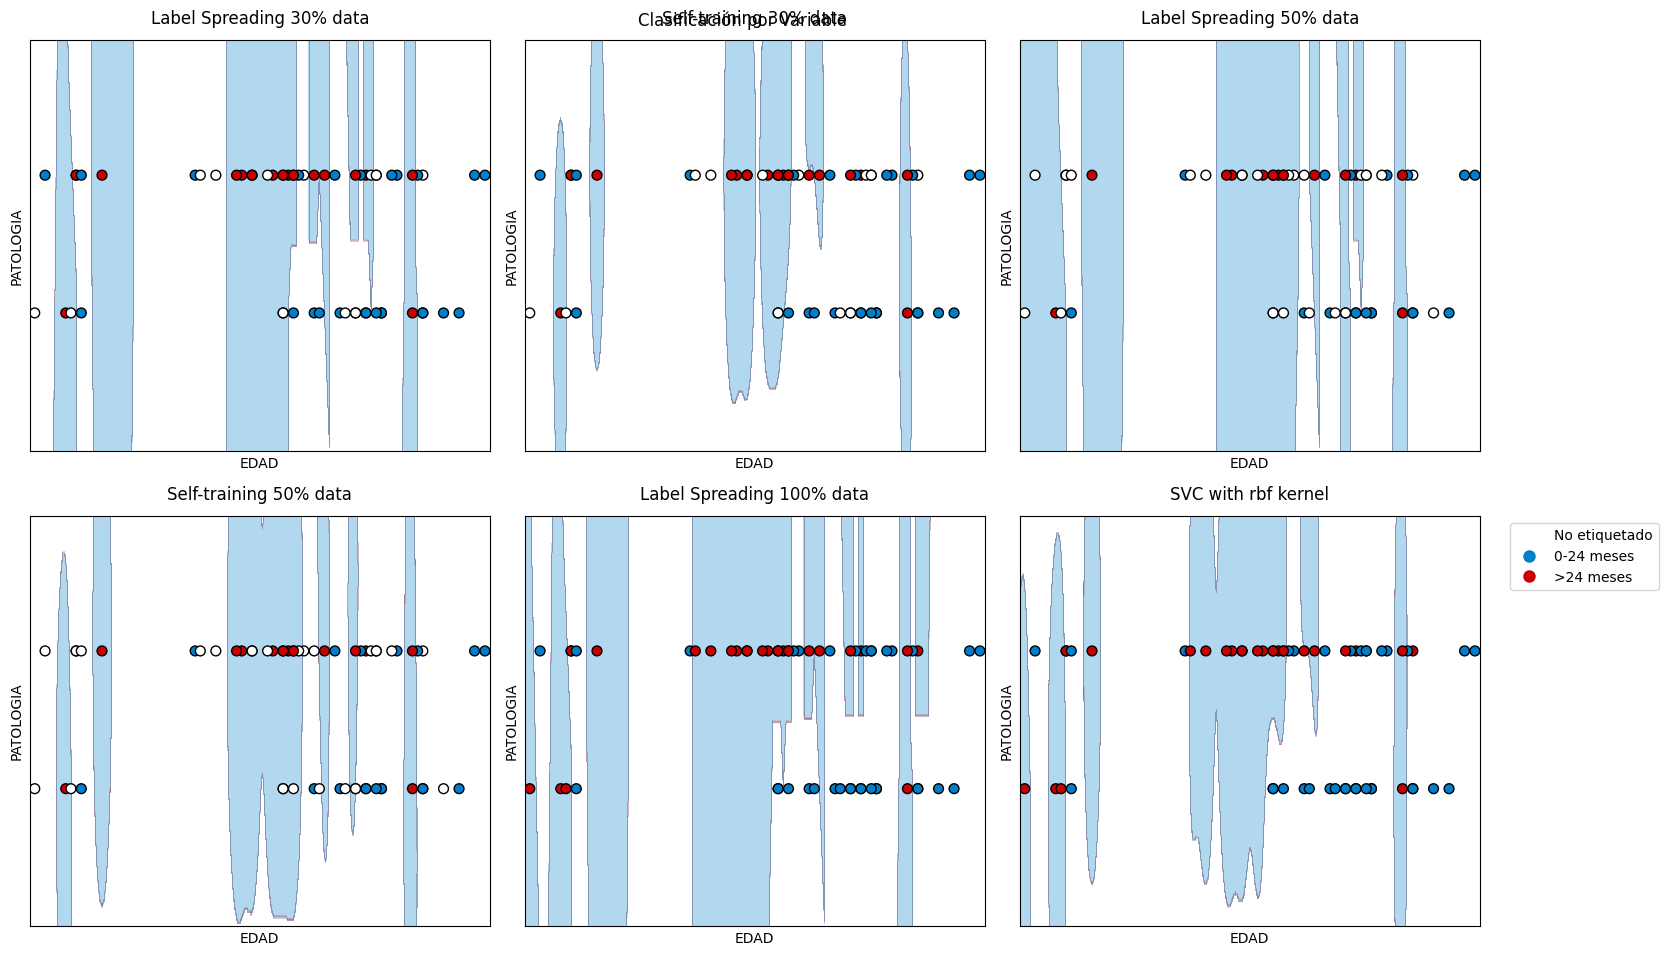

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC

# 1. Seleccionar las columnas específicas para X
X = dataset2[['EDAD', 'GENERO']].values  
y = dataset2['MESES'].values  

# 2. Crear etiquetas clasificadas (0-24 meses: 1, >24 meses: 2)
y_clas = np.where(y < 24, 1, 2)

# Configuración de parámetros
h = 0.02  # Tamaño del paso para la malla
rng = np.random.RandomState(0)
y_rand = rng.rand(y_clas.shape[0])

# 3. Crear versiones con datos no etiquetados
y_30 = np.copy(y_clas)
y_30[y_rand < 0.3] = -1  # 30% no etiquetados
y_50 = np.copy(y_clas)
y_50[y_rand < 0.5] = -1  # 50% no etiquetados

# 4. Entrenar modelos
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)

ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y_clas), y_clas, "Label Spreading 100% data")

st30 = (SelfTrainingClassifier(base_classifier).fit(X, y_30), y_30, "Self-training 30% data")
st50 = (SelfTrainingClassifier(base_classifier).fit(X, y_50), y_50, "Self-training 50% data")
rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y_clas), y_clas, "SVC with rbf kernel")

# 5. Crear malla para visualización
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 6. Mapa de colores personalizado
color_map = {
    -1: (1, 1, 1),   # Blanco - No etiquetado
    1: (0, 0.5, 0.8),# Azul - 0-24 meses
    2: (0.8, 0, 0)   # Rojo - >24 meses
}

# 7. Graficar resultados
plt.figure(figsize=(15, 10))
classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)

for i, (clf, y_train, title) in enumerate(classifiers):
    plt.subplot(2, 3, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=[color_map[-1], color_map[1], color_map[2]], alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=[color_map[y] for y in y_train], edgecolors="black", s=50)
    plt.title(title, pad=12)
    plt.xlabel("EDAD")
    plt.ylabel("PATOLOGIA")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Clasificación por Variable ", y=0.95)
plt.tight_layout()

# Leyenda personalizada
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='No etiquetado',
               markerfacecolor=color_map[-1], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='0-24 meses',
               markerfacecolor=color_map[1], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='>24 meses',
               markerfacecolor=color_map[2], markersize=10)
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Distribución de categorías:
1    18
2    15
3    27
Name: count, dtype: int64

Se aplicó PCA para visualización. Dimensiones reducidas: (60, 2)


E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


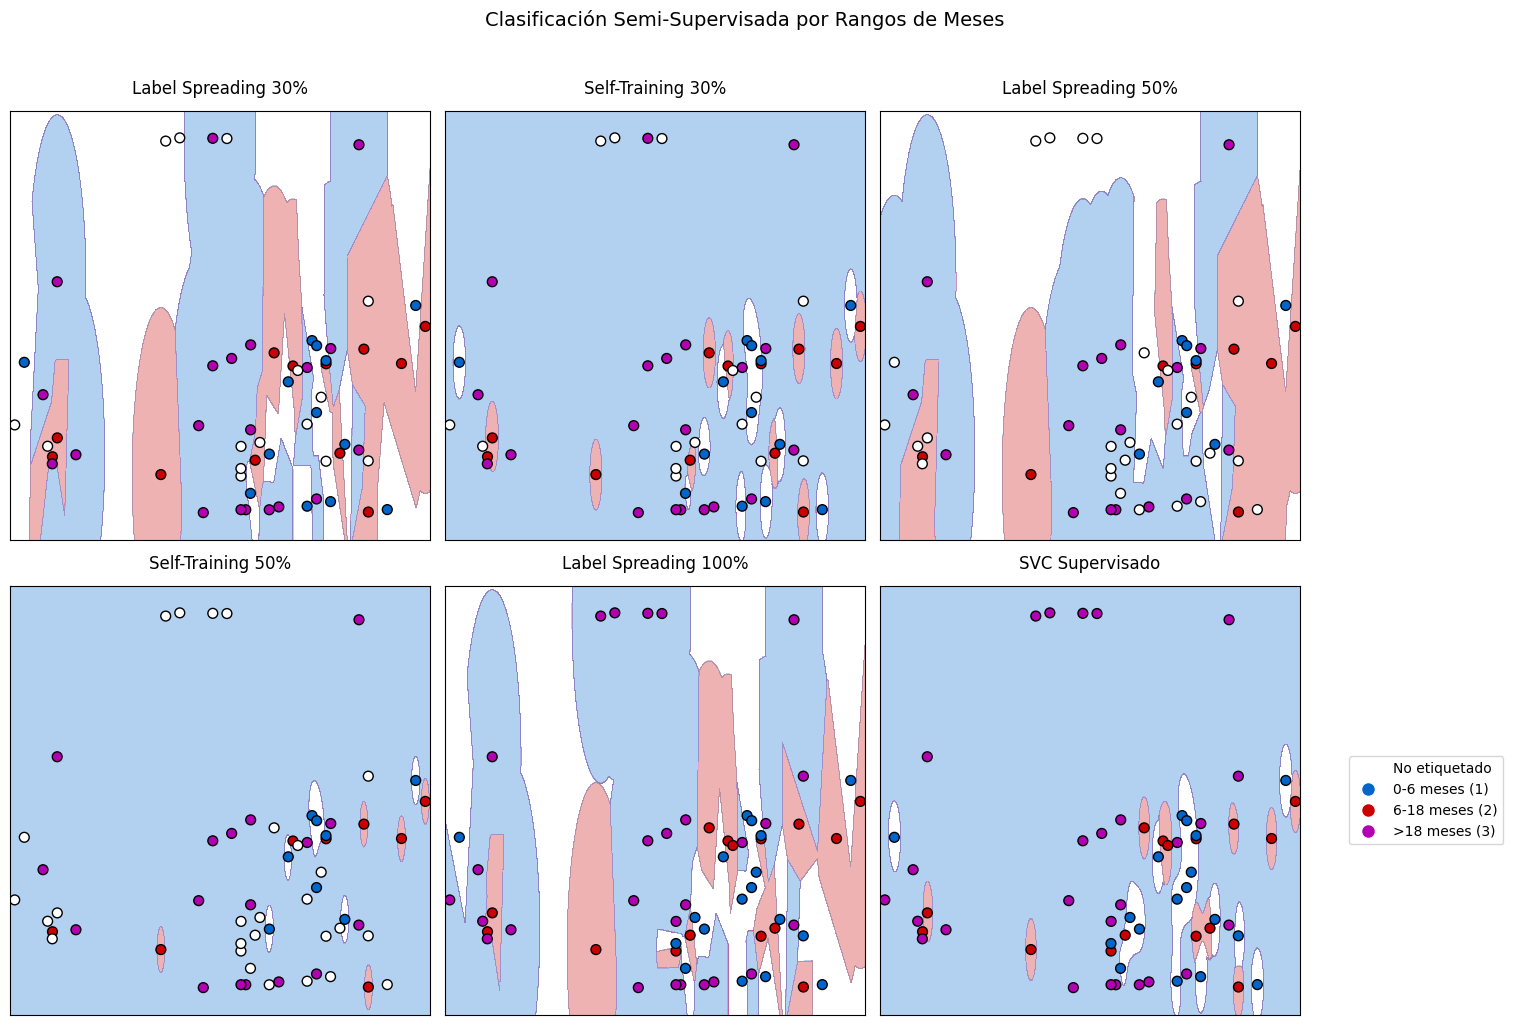

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC

# 2. Clasificar 'MESES' en rangos con valores numéricos 
bins = [0, 6, 18, np.inf]  
y_encoded = np.digitize(y, bins)  

print("\nDistribución de categorías:")
print(pd.Series(y_encoded).value_counts().sort_index())

# 3. Reducir dimensionalidad si es necesario (para visualización 2D)
if X.shape[1] > 2:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X)
    print("\nSe aplicó PCA para visualización. Dimensiones reducidas:", X_vis.shape)
else:
    X_vis = X.copy()

# 4. Configuración semi-supervisada
rng = np.random.RandomState(0)
y_rand = rng.rand(y_encoded.shape[0])

# Crear versiones con etiquetas faltantes (usamos -1 para no etiquetados)
y_30 = np.copy(y_encoded)
y_30[y_rand < 0.3] = -1  # 30% sin etiqueta

y_50 = np.copy(y_encoded)
y_50[y_rand < 0.5] = -1  # 50% sin etiqueta

# 5. Modelos
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)

# Lista de tuplas (modelo, etiquetas, nombre)
classifiers = [
    (LabelSpreading().fit(X_vis, y_30), y_30, "Label Spreading 30%"),
    (SelfTrainingClassifier(base_classifier).fit(X_vis, y_30), y_30, "Self-Training 30%"),
    (LabelSpreading().fit(X_vis, y_50), y_50, "Label Spreading 50%"),
    (SelfTrainingClassifier(base_classifier).fit(X_vis, y_50), y_50, "Self-Training 50%"),
    (LabelSpreading().fit(X_vis, y_encoded), y_encoded, "Label Spreading 100%"),
    (SVC(kernel="rbf", gamma=0.5).fit(X_vis, y_encoded), y_encoded, "SVC Supervisado")
]

# 6. Visualización
h = 0.02  # Tamaño de paso para la malla
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Mapa de colores para 5 categorías + no etiquetados
color_map = {
    -1: (1, 1, 1),    # Blanco
    1: (0, 0.4, 0.8), # Azul (0-6 meses)
    2: (0.8, 0, 0),   # Rojo (6-24 meses)
    3: (0.7, 0, 0.7), # Morado (24-30 meses)
}

# Gráficos
plt.figure(figsize=(15, 10))
for i, (clf, y_train, title) in enumerate(classifiers):
    plt.subplot(2, 3, i+1)
    
    # Predecir y visualizar fronteras
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=list(color_map.values()), alpha=0.3, levels=5)
    
    # Puntos de entrenamiento
    colors = [color_map[y] for y in y_train]
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=colors, edgecolors='k', s=50)
    
    plt.title(title, pad=12)
    plt.xticks([])
    plt.yticks([])

# Leyenda
legend_labels = ['No etiquetado', '0-6 meses (1)', '6-18 meses (2)', '>18 meses (3)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor=color_map[key], 
                   markersize=10, 
                   label=label) 
             for key, label in zip([-1, 1, 2, 3], legend_labels)],
           bbox_to_anchor=(1.3, 0.5), loc='center')

plt.suptitle("Clasificación Semi-Supervisada por Rangos de Meses", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Se evaluaron dos enfoques principales: Label Spreading y Self-Training, utilizando diferentes porcentajes de datos etiquetados (30%, 50% y 100% como referencia). Los resultados muestran que ambos métodos son capaces de aproximarse al rendimiento del modelo supervisado (SVC) incluso con solo un 30-50% de las etiquetas, lo que demuestra el potencial de las técnicas semi-supervisadas para reducir la dependencia de grandes conjuntos de datos etiquetados. Sin embargo, se observa que el desempeño mejora significativamente al aumentar el porcentaje de datos etiquetados, particularmente en el caso de Label Spreading, que produce fronteras de decisión más suaves y consistentes.

Un hallazgo importante es la diferencia en el comportamiento de los dos métodos semi-supervisados. Label Spreading genera regiones de clasificación más uniformes y continuas, lo que sugiere que es más adecuado cuando los datos subyacentes tienen una estructura clara y bien conectada. Por otro lado, Self-Training, que se basa en un clasificador base (en este caso un SVC con kernel RBF), produce resultados más variables y cercanos al enfoque supervisado, pero puede ser más sensible a errores en la fase inicial de auto-etiquetado, especialmente cuando se dispone de pocas etiquetas iniciales. Esto se manifiesta en algunas irregularidades en las fronteras de decisión cuando solo se usa el 30% de los datos etiquetados.

La presencia de puntos blancos (datos no etiquetados) dentro de regiones coloreadas revela áreas donde los modelos muestran incertidumbre en la clasificación. Este fenómeno es más pronunciado en los experimentos con menor porcentaje de etiquetas y sugiere posibles limitaciones en la capacidad de los métodos para propagar información confiable en ciertas zonas del espacio de características. Además, la imagen plantea preguntas sobre la distribución subyacente de los datos, ya que un desbalance significativo entre las categorías podría afectar el rendimiento de los clasificadores, particularmente para la clase de mayor edad (>18 meses), que podría estar subrepresentada.

#### Efecto de la variación del umbral para el autoentrenamiento

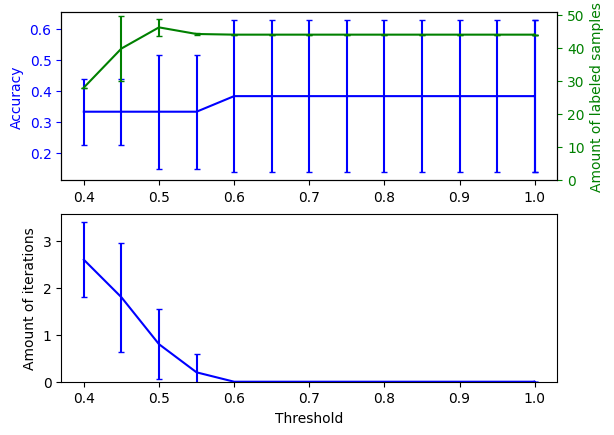

In [88]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle

n_splits = 5
bins = [0, 6, 18, np.inf]  
y_encoded = np.digitize(y, bins)  
y_true = y_encoded.copy()
y_encoded[40:] = -1
total_samples = y_encoded.shape[0]

base_classifier = SVC(probability=True, gamma=0.001, random_state=42)

x_values = np.arange(0.4, 1.05, 0.05)
x_values = np.append(x_values, 0.99999)
scores = np.empty((x_values.shape[0], n_splits))
amount_labeled = np.empty((x_values.shape[0], n_splits))
amount_iterations = np.empty((x_values.shape[0], n_splits))

for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(base_classifier, threshold=threshold)

    # We need manual cross validation so that we don't treat -1 as a separate
    # class when computing accuracy
    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, test_index) in enumerate(skfolds.split(X, y_encoded)):
        X_train = X[train_index]
        y_train = y_encoded[train_index]
        X_test = X[test_index]
        y_test = y_encoded[test_index]
        y_test_true = y_true[test_index]

        self_training_clf.fit(X_train, y_train)

        # The amount of labeled samples that at the end of fitting
        amount_labeled[i, fold] = (
            total_samples
            - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        )
        # The last iteration the classifier labeled a sample in
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test_true, y_pred)


ax1 = plt.subplot(211)
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="b"
)
ax1.set_ylabel("Accuracy", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="g",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of labeled samples", color="g")
ax2.tick_params("y", colors="g")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="b",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of iterations")
ax3.set_xlabel("Threshold")

plt.show()

OTROS:

### Random Survival Forests

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from xgbse import XGBSEKaplanTree
from xgbse.converters import convert_to_structured
import matplotlib.pyplot as plt

In [119]:
dataset3= data_glio.copy()
# Eliminar filas con valores nulos.
dataset3 = dataset3.dropna( subset= ['MESES', "GENERO", "EDAD", "PATOLOGIA", "LADO_LESION", "LOCALIZACION",
    "CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
    "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA",
    "IDH", "GRUPO"])

dataset3 = dataset3[['MESES', "GENERO", "EDAD", "PATOLOGIA", "LADO_LESION", "LOCALIZACION",
    "CONVULSIONES", "LANGUAGE", "MOTOR","SENSORIAL", "COMPORTAMIENTO", "ABORDAJE_CRANIOTOMIA", "RESECCION_RAD",
    "NP_CONV", "NP_DEF_LENG", "NP_DEF_MOTORA",
    "IDH"]]


In [120]:
print("Mínimo:", dataset3["MESES"].min())
print("Máximo:", dataset3["MESES"].max())
print("Cantidad de valores negativos:", (dataset3["MESES"] < 0).sum())
print("Ejemplos con valores negativos:")
print(dataset3[dataset3["MESES"] < 0].head())


Mínimo: 0.09868421053
Máximo: 64.60526316
Cantidad de valores negativos: 0
Ejemplos con valores negativos:
Empty DataFrame
Columns: [MESES, GENERO, EDAD, PATOLOGIA, LADO_LESION, LOCALIZACION, CONVULSIONES, LANGUAGE, MOTOR, SENSORIAL, COMPORTAMIENTO, ABORDAJE_CRANIOTOMIA, RESECCION_RAD, NP_CONV, NP_DEF_LENG, NP_DEF_MOTORA, IDH]
Index: []


In [121]:

from sksurv.util import Surv

y_clas = Surv.from_arrays(
    event=np.ones(len(dataset3), dtype=bool),  # todos murieron → True
    time=dataset3["MESES"].astype(float)
)

X = dataset3.drop(columns=['MESES'])

# 3. Dividir datos (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y_clas, test_size=0.1, random_state=42)


rsf = RandomSurvivalForest(
    n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
rsf.fit(X_train, y_train)

c_index = rsf.score(X_test, y_test)
f"{c_index:.5f}"


'0.86667'

El indice de concordancia es de 0.86.

In [122]:
X_test_sorted = X_test.sort_values(by=["LOCALIZACION", "EDAD"])
X_test_sel = pd.concat((X_test_sorted.head(3), X_test_sorted.tail(3)))

X_test_sel

,GENERO,EDAD,PATOLOGIA,LADO_LESION,LOCALIZACION,CONVULSIONES,LANGUAGE,MOTOR,SENSORIAL,COMPORTAMIENTO,ABORDAJE_CRANIOTOMIA,RESECCION_RAD,NP_CONV,NP_DEF_LENG,NP_DEF_MOTORA,IDH
19,1,14,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,1.0,1
13,1,41,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
32,1,70,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,0
31,0,76,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
5,1,47,2.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,1
49,0,56,2.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,0


Las puntuaciones de riesgo previstas indican que el riesgo en pacientes 2 y 3 es mayor al de los primeros.

In [123]:
pd.Series(rsf.predict(X_test_sel))

0    42.653316
1    40.854521
2    49.423886
3    49.108070
4    43.272251
5    44.737271
dtype: float64

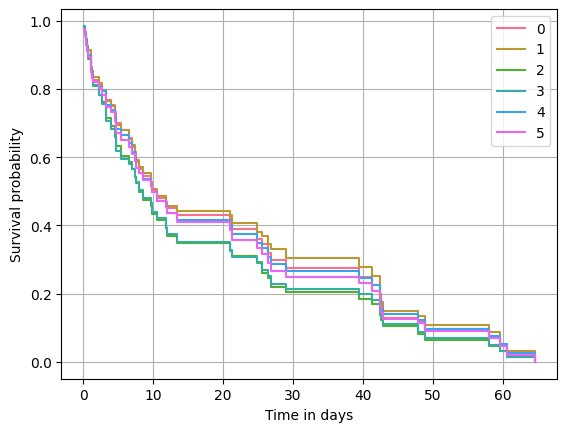

In [124]:
surv = rsf.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

Acumulativo

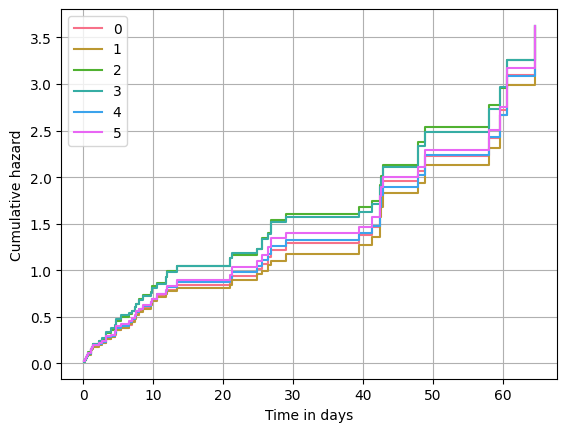

In [125]:
surv = rsf.predict_cumulative_hazard_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(rsf.unique_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

Importancia de las caracteristicas basadas en permutaciones

In [126]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=42)

In [127]:
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
EDAD,0.262222,0.152930
MOTOR,0.106667,0.032660
GENERO,0.062222,0.061904
ABORDAJE_CRANIOTOMIA,0.053333,0.060614
NP_DEF_MOTORA,0.044444,0.031427
LADO_LESION,0.031111,0.033259
RESECCION_RAD,0.026667,0.032660
CONVULSIONES,0.022222,0.031427
COMPORTAMIENTO,0.013333,0.026667
PATOLOGIA,0.000000,0.000000


### XGBoots para analisis de sobrevida

In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgbse import XGBSEKaplanNeighbors
from xgbse.metrics import concordance_index
from xgbse.converters import convert_to_structured
from xgbse.converters import convert_to_structured
import matplotlib.pyplot as plt


In [139]:


# Construir y_clas (todos murieron -> event=True)
y = Surv.from_arrays(
    event=np.ones(len(dataset3), dtype=bool),
    time=dataset3["MESES"].astype(float)
)

# Variables predictoras (quita MESES del X)
X = dataset3.drop(columns=["MESES"])

# Train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42
)

#Crear bins de tiempo (usando los tiempos de y directamente)
# Lo correcto es usar y["time"] del dtype estructurado:
TIME_BINS = np.linspace(y["time"].min(), y["time"].max(), 10)

#  Entrenar con diferentes escalas sin DEFAULT_PARAMS
for scale in [1.5, 1.0, 0.5]:
    # Creamos el modelo sin parámetros extra
    xgbse_model = XGBSEKaplanNeighbors(n_neighbors=15)

    # Entrenar modelo
    xgbse_model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        early_stopping_rounds=5,
        time_bins=TIME_BINS
    )

    # Predecir y evaluar
    preds = xgbse_model.predict(X_valid)
    cind = concordance_index(y_valid, preds)

    # Tiempos que queremos consultar
    time_points = [6, 18, 24]

    # Buscar columnas más cercanas
    closest_times = [preds.columns[np.abs(preds.columns - t).argmin()] for t in time_points]

    # Calcular promedio
    avg_probs = preds[closest_times].mean().values.round(4).tolist()

print(f"\n aft_loss_distribution_scale: {scale} (IGNORADO para KaplanNeighbors)")
print(f"C-index: {cind:.3f}")
print(f"Probabilidad promedio de supervivencia a {time_points} meses (aprox. en {closest_times}): {avg_probs}")
print("-" * 40)



E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\xgbse\non_parametric.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.DataFrame(C_exp).fillna(method="bfill").fillna(method="ffill").values



 aft_loss_distribution_scale: 0.5 (IGNORADO para KaplanNeighbors)
C-index: 0.733
Probabilidad promedio de supervivencia a [6, 18, 24] meses (aprox. en [7.266081871582224, 14.433479532634447, 21.60087719368667]): [0.7556, 0.5556, 0.5111]
----------------------------------------


E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\xgbse\non_parametric.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.DataFrame(C_exp).fillna(method="bfill").fillna(method="ffill").values
E:\PROFILES\ocaballero\AppData\Roaming\Python\Python312\site-packages\xgbse\non_parametric.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return pd.DataFrame(C_exp).fillna(method="bfill").fillna(method="ffill").values


Hay una caída moderada en la supervivencia entre 7 y 14 meses (de 76% a 56%)

Luego, entre 14 y 21 meses, la caída es menor (56% → 51%), lo que podría sugerir que los que sobreviven al primer año tienden a estabilizarse un poco.

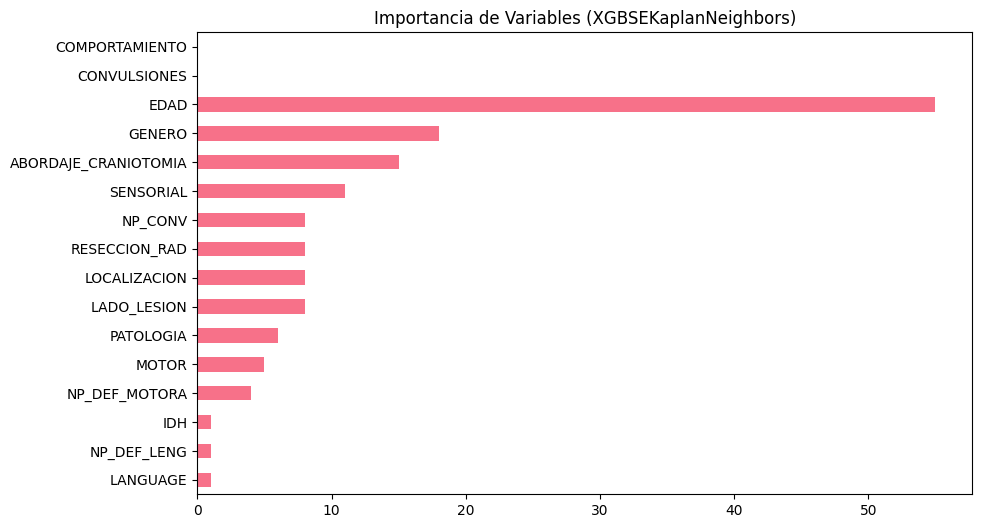

In [140]:
best_model = XGBSEKaplanNeighbors(n_neighbors=15)
best_model.fit(X_train, y_train, time_bins=TIME_BINS)

plt.figure(figsize=(10, 6))
pd.Series(best_model.feature_importances_, index=X.columns).sort_values().plot.barh()
plt.title("Importancia de Variables (XGBSEKaplanNeighbors)")
plt.show()

In [141]:
# Calcular tiempo esperado de supervivencia para cada paciente
expected_survival_time = np.trapz(preds.values, preds.columns, axis=1)


In [142]:
from sklearn.metrics import mean_absolute_error, r2_score

# Tiempo real observado en validación
real_times = y_valid["time"]

# MAE y R²
mae = mean_absolute_error(real_times, expected_survival_time)
r2  = r2_score(real_times, expected_survival_time)

print(f"MAE: {mae:.2f} meses")
print(f"R² : {r2:.3f}")


MAE: 12.47 meses
R² : 0.273


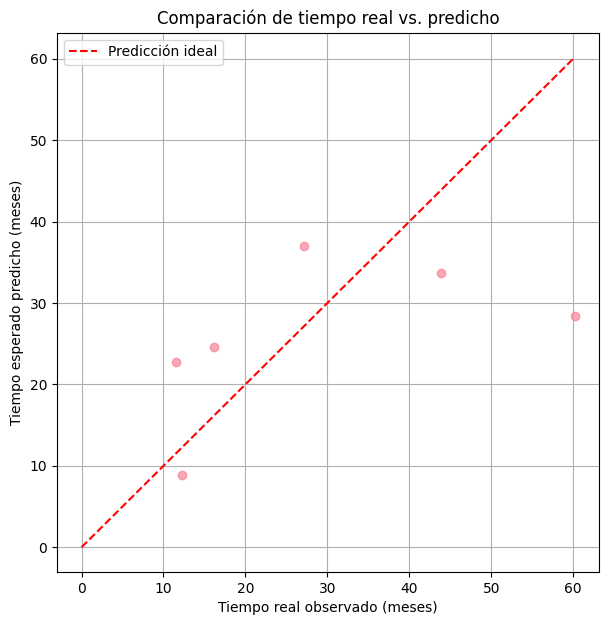

In [144]:
expected_survival_time = np.trapz(preds.values, preds.columns, axis=1)
real_times = y_valid["time"]
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(real_times, expected_survival_time, alpha=0.6)

# Línea ideal (predicción = realidad)
max_val = max(real_times.max(), expected_survival_time.max())
plt.plot([0, max_val], [0, max_val], 'r--', label="Predicción ideal")

plt.xlabel("Tiempo real observado (meses)")
plt.ylabel("Tiempo esperado predicho (meses)")
plt.title("Comparación de tiempo real vs. predicho")
plt.legend()
plt.grid()
plt.show()


XGBoots para analisis de supervivencia (Modelo de Cox)

In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt


 Rendimiento del modelo:
C-index (train): 0.956
C-index (test): 0.745


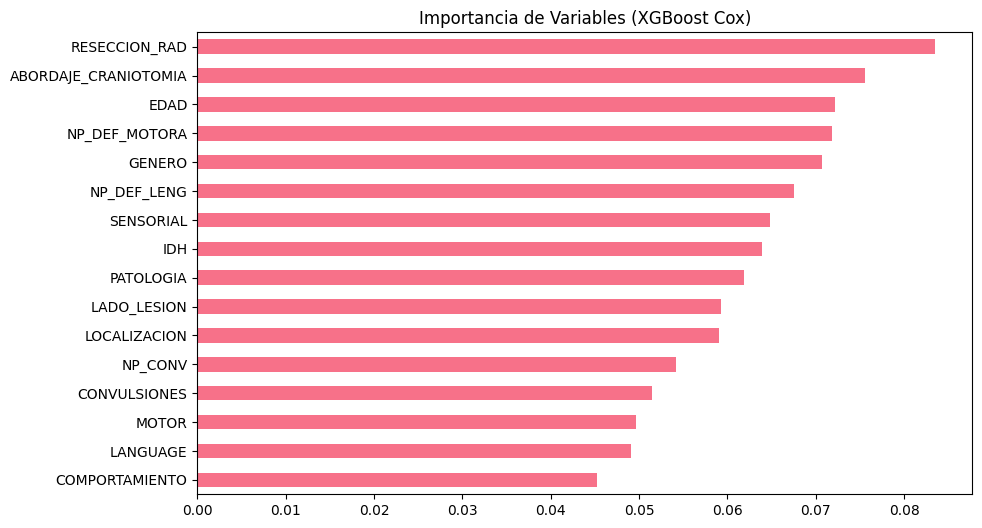


  Predicciones de ejemplo:
   MESES_real  Riesgo_predicho  Rango_riesgo
0   12.203947         8.422055             0
1   43.815789         0.068897             4
2   11.480263         1.164365             2
3   27.171053         0.074583             3
4   60.197368         3.937222             1


In [ ]:

# 2. Preparar datos 
X = dataset3.drop(columns=['MESES'])  # Variables predictoras
y = dataset3['MESES'].values  # Tiempo de supervivencia en meses
censoring = np.ones(len(dataset3))  # Todos los eventos observados (1=fallecieron)

# 3. Dividir datos (80/20)
X_train, X_test, y_train, y_test, cens_train, cens_test = train_test_split(
    X, y, censoring, test_size=0.2, random_state=42
)

# 4. Configurar y entrenar modelo XGBoost Cox
model = XGBRegressor(
    objective='survival:cox',
    eval_metric='cox-nloglik',
    tree_method='hist',
    max_depth=3,          # Reducir profundidad para evitar overfitting
    n_estimators=100,     # Número de árboles
    learning_rate=0.1,    # Tasa de aprendizaje
    subsample=0.8,        # Porcentaje de muestras por árbol
    colsample_bytree=0.8, # Porcentaje de features por árbol
    random_state=42
)

model.fit(
    X_train, 
    y_train,
    sample_weight=cens_train,  # Indicadores de censura
    verbose=True
)

# 5. Evaluar el modelo
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calcular C-index (índice de concordancia)
c_index_train = concordance_index(
    y_train, -train_pred, cens_train  # Nota: negativo para riesgo
)
c_index_test = concordance_index(
    y_test, -test_pred, cens_test
)

print(f"\n Rendimiento del modelo:")
print(f"C-index (train): {c_index_train:.3f}")
print(f"C-index (test): {c_index_test:.3f}")

# 6. Visualizar importancia de variables
plt.figure(figsize=(10, 6))
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot.barh()
plt.title("Importancia de Variables (XGBoost Cox)")
plt.show()

# 7. Ejemplo de predicciones
print("\n  Predicciones :")
sample_preds = pd.DataFrame({
    'MESES_real': y_test[:5],
    'Riesgo_predicho': test_pred[:5],
    'Rango_riesgo': (-test_pred[:5]).argsort().argsort()  # Ordenar por riesgo
})
print(sample_preds)